In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [7]:
yolo=cv2.dnn.readNet("./yolov3.weights","./yolov3.cfg")


In [8]:
classes=[]
with open("C:/Parami/yolo/coco.names",'r') as f:
    classes=f.read().splitlines()

In [9]:
img=cv2.imread("c:/Parami/yolo/cd/cd4.png")
img.shape

(799, 1237, 3)

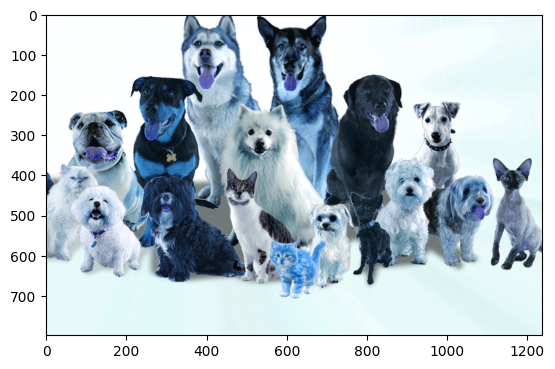

In [10]:
plt.imshow(img)

In [11]:
pic=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [12]:
pic.shape

(1, 3, 320, 320)

In [13]:
yolo.setInput(pic)

In [14]:
output_l=yolo.getUnconnectedOutLayersNames()
outs=yolo.forward(output_l)

In [15]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            width = int(detection[2] * img.shape[1])
            height = int(detection[3] * img.shape[0])
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, width, height])


In [16]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [17]:
for i in indices:
    box = boxes[i]
    x, y, width, height = box
    label=str(classes[class_ids[i]])
    conf=str(round(confidences[i],2))
    cv2.rectangle(img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    cv2.putText(img, label+" "+conf, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


In [18]:
cv2.namedWindow("yolo op", cv2.WINDOW_NORMAL)
cv2.imshow("yolo op",img)
cv2.waitKey(0)
cv2.destroyAllWindows()